In [2]:
import sys
import os
import scanpy as sc
import pandas as pd

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [3]:
# read in the data relevant for this figure

# output from the TALON run
def get_sc_data():
    fname = '../processing/talon/sc_talon_read_annot.tsv'

    df = pd.read_csv(fname, sep='\t')
    df = add_read_annot_metadata(df)
    
    return df

# output from transforming the unfiltered TALON abundanca matrix into 
# a scanpy AnnData object
def get_sc_adata():
    fname = '../processing/scanpy/sc_gene.h5ad'
    adata = sc.read(fname)
    
    return adata
    
# output from TALON filtering
def get_sc_whitelist():
    fname = '../processing/talon/sc_whitelist.csv'
    whitelist = read_whitelist(fname)
    
    return whitelist

def get_sc_bulk_data():
    fname = '../processing/talon/bulk_sc_talon_read_annot.tsv'

    df = pd.read_csv(fname, sep='\t')
    df = add_read_annot_metadata(df, bulk=True)
    
    return df

### Panel 1B

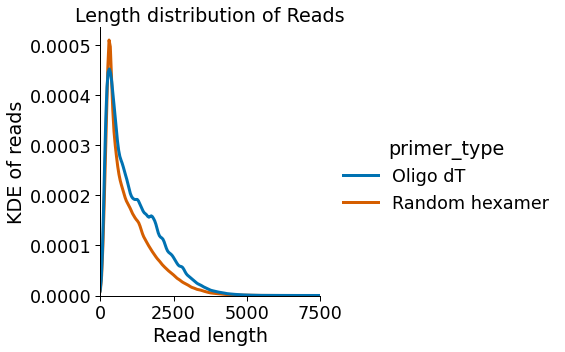

In [4]:
df = get_sc_data()
opref = 'figures/dt_v_randhex'
c_dict, order = get_priming_colors()
plot_read_len_kde(df, 'primer_type', c_dict, order, opref)

### Panel 1C

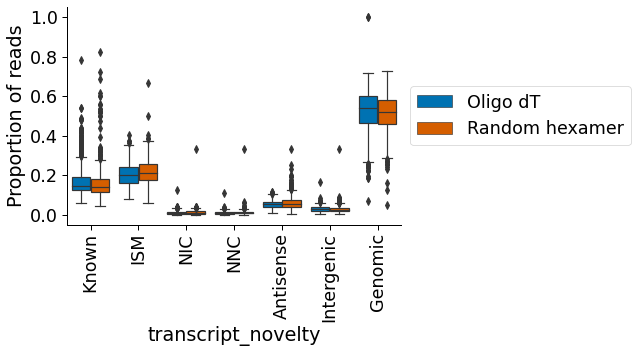

In [5]:
df = get_sc_data()
opref = 'figures/dt_v_randhex'
c_dict, order = get_priming_colors()
plot_reads_per_cell_nov(df, 'primer_type', c_dict, order, opref)

### Panel 1D

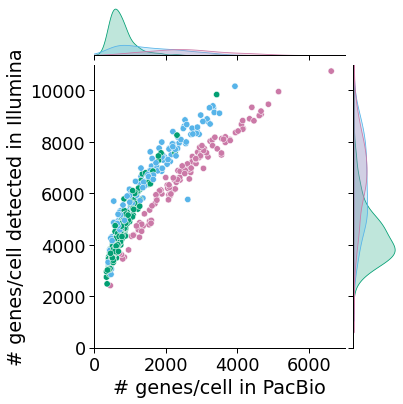

In [11]:
opref = 'figures/sample'
adata = get_sc_adata()
c_dict, order = get_sample_colors()
plot_short_long_det(adata.obs, c_dict, order, opref, 
                    xlim=7000, ylim=11000, how='gene')

### Panel 1E

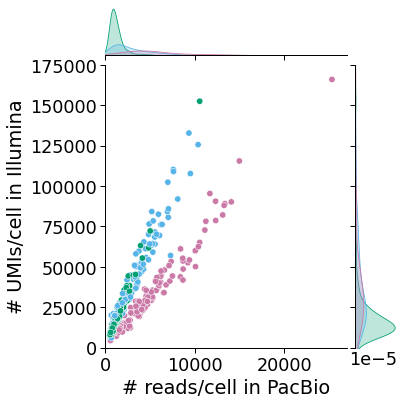

In [12]:
opref = 'figures/sample'
adata = get_sc_adata()
c_dict, order = get_sample_colors()
plot_short_long_det(adata.obs, c_dict, order, opref, 
                    xlim=27000, ylim=175000, how='read')

### Panel 1F

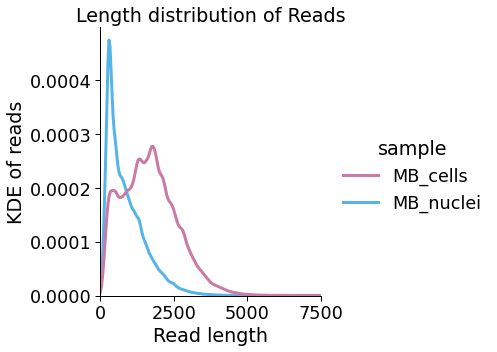

In [5]:
opref = 'figures/cells_v_nuclei'
df = get_sc_data()

# remove genomic reads and limit to only MB cells and nuclei
df = df.loc[df['sample'] != 'MT_nuclei']
df = df[df.transcript_novelty!='Genomic']

c_dict, order = get_sample_colors(samples=['MB_cells', 'MB_nuclei'])
plot_read_len_kde(df, 'sample', c_dict, order, opref)

### Panel 1G

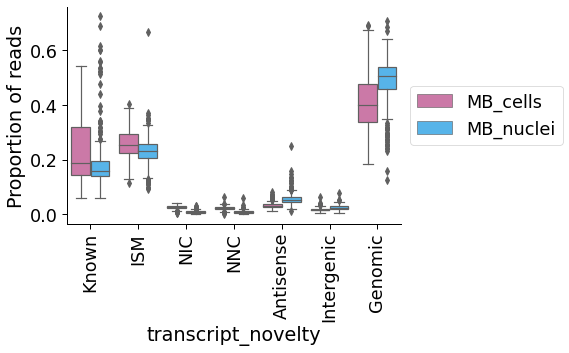

In [14]:
df = get_sc_data()

# limit to only MB cells and nuclei
df = df.loc[df['sample'] != 'MT_nuclei']
c_dict, order = get_sample_colors(samples=['MB_cells', 'MB_nuclei'])

plot_reads_per_cell_nov(df, 'sample', c_dict, order, opref)

### Panel 1H

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3347: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


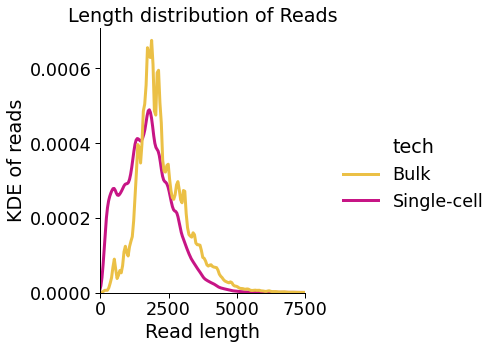

In [6]:
opref = 'figures/bulk_vs_sc'
df = get_sc_bulk_data()

# myoblasts only, no genomic reads, no single-nucleus
df = df.loc[df['sample'].isin(['MB', 'MB_cells'])]
df = df.loc[(df.primer_type == 'Oligo dT')|(df.tech=='Bulk')]
df = df.loc[df.transcript_novelty != 'Genomic']

c_dict, order = get_2_tech_colors()
plot_read_len_kde(df, 'tech', c_dict, order, opref, common_norm=False)

### Panel 1I

  transcript_novelty   counts
0          Antisense   259540
1            Genomic   448898
2                ISM  1102134
3         Intergenic    40109
4              Known  6654958
5                NIC   531944
6                NNC   284313


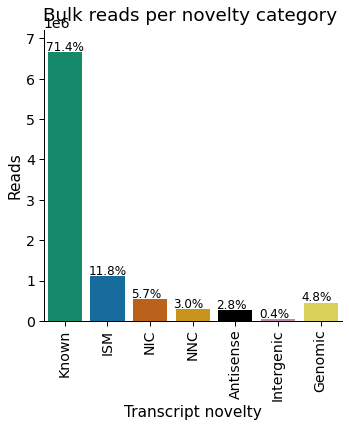

In [16]:
opref = 'figures/bulk'
df = get_sc_bulk_data()
c_dict, order = get_talon_nov_colors()
d = df.loc[df.experiment == 'bulk', 'dataset'].unique().tolist()
plot_read_novelty(df, opref, c_dict, order, title='Bulk', \
                  datasets=d, ylim=7200000)

### Panel 1J

  transcript_novelty  counts
0          Antisense   70402
1            Genomic  709033
2                ISM  386720
3         Intergenic   25641
4              Known  317621
5                NIC   20503
6                NNC   15492


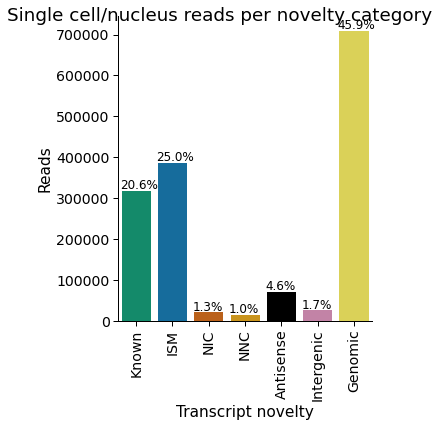

In [17]:
opref = 'figures/sc'
df = get_sc_bulk_data()
c_dict, order = get_talon_nov_colors()
d = df.loc[df.experiment == 'sc', 'dataset'].unique().tolist()
plot_read_novelty(df, opref, c_dict, order, title='Single cell/nucleus', \
                  datasets=d)

### Panel 1K

  transcript_novelty  counts
0          Antisense     927
1                ISM   16207
2         Intergenic    1042
3              Known   22279
4                NIC     393
5                NNC     134


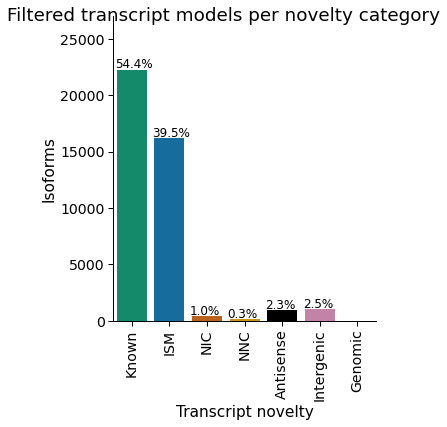

<Figure size 432x288 with 0 Axes>

In [18]:
opref = 'figures/sc_filtered'
df = get_sc_data()
whitelist = get_sc_whitelist()
c_dict, order = get_talon_nov_colors()
plot_transcript_novelty(df, opref, c_dict, order, title='Filtered',
                        whitelist=whitelist, ylim=27000)